In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('news.csv')

In [41]:
df.head()

id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [42]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [43]:
df['labels'] = [1 if label=='REAL' else 0 for label in df['label'] ]

In [44]:
df.head()

id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  labels  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE       0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE       0  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL       1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE       0  
4  It's primary day in New York and front-runners...  REAL       1

In [45]:
df.isnull().sum()

id        0
title     0
text      0
label     0
labels    0
dtype: int64

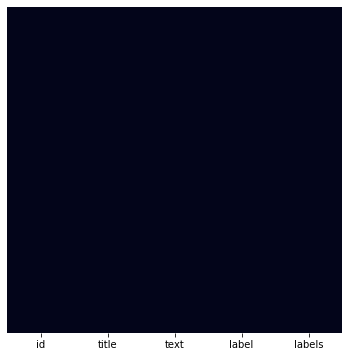

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt 

ax, fig = plt.subplots(figsize = (6,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar=False)

In [47]:
df.drop('label', axis=1)

id                                              title  \
0      8476                       You Can Smell Hillary’s Fear   
1     10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2      3608        Kerry to go to Paris in gesture of sympathy   
3     10142  Bernie supporters on Twitter erupt in anger ag...   
4       875   The Battle of New York: Why This Primary Matters   
...     ...                                                ...   
6330   4490  State Department says it can't find emails fro...   
6331   8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332   8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333   4021  In Ethiopia, Obama seeks progress on peace, se...   
6334   4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  labels  
0     Daniel Greenfield, a Shillman Journalism Fello...       0  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...       0  
2     U.S. Secretary of State John F. Kerry said Mon...       1  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...       0  
4     It's primary day in New York and front-runners...       1  
...                                                 ...     ...  
6330  The State Department told the Republican Natio...       1  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...       0  
6332   Anti-Trump Protesters Are Tools of the Oligar...       0  
6333  ADDIS ABABA, Ethiopia —President Obama convene...       1  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...       1  

[6335 rows x 4 columns]

In [48]:
X_train = df.drop(["labels","label"], axis=1  )

In [49]:
print(X_train.shape)
X_train.head()

(6335, 3)


id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text  
0  Daniel Greenfield, a Shillman Journalism Fello...  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  
2  U.S. Secretary of State John F. Kerry said Mon...  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  
4  It's primary day in New York and front-runners...

In [50]:
y_train = df['labels']

In [51]:
print(y_train.shape)
y_train.head()

(6335,)


0    0
1    0
2    1
3    0
4    1
Name: labels, dtype: int64

In [52]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential


In [53]:
voc_size = 5000

# One hot representation

In [54]:
messages = X_train.copy()

In [55]:
messages.head()

id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text  
0  Daniel Greenfield, a Shillman Journalism Fello...  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  
2  U.S. Secretary of State John F. Kerry said Mon...  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  
4  It's primary day in New York and front-runners...

In [56]:
messages.shape

(6335, 3)

In [57]:
messages.reset_index(inplace=True)

In [58]:
import nltk
import re
from nltk.corpus import stopwords

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
len(messages)

6335

In [61]:
# for text preprocessing

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps=PorterStemmer()

corpus = []

In [62]:
### Dataset Preprocessing

for i in range(0, len(messages)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [63]:
len(corpus)

6335

In [64]:
corpus[:5]

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter']

In [65]:
onehot_repr=[one_hot(words,voc_size) for words in corpus] 
onehot_repr[0:4]

[[1860, 3184, 314],
 [4225, 2430, 2797, 29, 3160, 2415, 4453, 652, 4192, 3271, 2454],
 [837, 3579, 219, 2262, 1921],
 [3952, 3906, 3289, 3892, 1798, 2157, 3331, 2374]]

# Adding padding bits

In [66]:
sent_length = 25

embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)

In [81]:
print(embedded_docs[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 1860 3184  314]


In [68]:
len(embedded_docs)

6335

# Normal LSTM model

In [69]:
from tensorflow.keras.layers import Dropout
## Creating normal lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 40)            200000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [87]:
import numpy as np

X_final=np.array(embedded_docs).astype(np.float32)
y_final=np.array(y_train).astype(np.float32)

In [83]:
X_final.shape, y_final.shape

((6335, 25), (6335,))

In [118]:
from sklearn.model_selection import train_test_split

#splitting for train and test
X, X_test, y, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=7)

In [119]:
### normal lstm Training
model.fit(X,y,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
80/80 [==============================] - 4s 51ms/step - loss: 0.0288 - accuracy: 0.9903 - val_loss: 1.5073 - val_accuracy: 0.7758
Epoch 2/10
80/80 [==============================] - 4s 47ms/step - loss: 0.0226 - accuracy: 0.9921 - val_loss: 1.6313 - val_accuracy: 0.7782
Epoch 3/10
80/80 [==============================] - 4s 49ms/step - loss: 0.0226 - accuracy: 0.9905 - val_loss: 1.5777 - val_accuracy: 0.7751
Epoch 4/10
80/80 [==============================] - 3s 42ms/step - loss: 0.0219 - accuracy: 0.9941 - val_loss: 1.5989 - val_accuracy: 0.7751
Epoch 5/10
80/80 [==============================] - 4s 47ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 1.5125 - val_accuracy: 0.7758
Epoch 6/10
80/80 [==============================] - 4s 47ms/step - loss: 0.0213 - accuracy: 0.9939 - val_loss: 1.6473 - val_accuracy: 0.7727
Epoch 7/10
80/80 [==============================] - 4s 46ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 1.4920 - val_accuracy: 0.7640
Epoch 8/10
80

In [120]:
y_predict = model.predict_classes(X, verbose=0)
for i in range(10):
	print('Expected:', int(y[i]), 'Predicted', y_predict[i])

Expected: 0 Predicted [0]
Expected: 0 Predicted [0]
Expected: 0 Predicted [0]
Expected: 1 Predicted [1]
Expected: 1 Predicted [1]
Expected: 0 Predicted [0]
Expected: 0 Predicted [0]
Expected: 1 Predicted [1]
Expected: 0 Predicted [0]
Expected: 0 Predicted [0]


## Bidirectional lstm

In [111]:
from tensorflow.keras.layers import Bidirectional
## Creating Bidirectional model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 25, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
model1.fit(X,y,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
80/80 [==============================] - 6s 69ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 1.5128 - val_accuracy: 0.7703
Epoch 2/10
80/80 [==============================] - 5s 66ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 1.6459 - val_accuracy: 0.7703
Epoch 3/10
80/80 [==============================] - 6s 71ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 1.5799 - val_accuracy: 0.7593
Epoch 4/10
80/80 [==============================] - 5s 64ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 1.7255 - val_accuracy: 0.7577
Epoch 5/10
80/80 [==============================] - 5s 60ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 1.8262 - val_accuracy: 0.7640
Epoch 6/10
80/80 [==============================] - 5s 61ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 2.0058 - val_accuracy: 0.7609
Epoch 7/10
80/80 [==============================] - 5s 60ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 2.0883 - val_accuracy: 0.7616
Epoch 8/10
80

In [121]:
y_predict = model1.predict_classes(X, verbose=0)
for i in range(10):
	print('Expected:', int(y[i]), 'Predicted', y_predict[i])

Expected: 0 Predicted [0]
Expected: 0 Predicted [0]
Expected: 0 Predicted [0]
Expected: 1 Predicted [1]
Expected: 1 Predicted [1]
Expected: 0 Predicted [0]
Expected: 0 Predicted [0]
Expected: 1 Predicted [1]
Expected: 0 Predicted [0]
Expected: 0 Predicted [0]


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[588,  50],
       [ 40, 589]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9289660615627466

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       638
           1       0.92      0.94      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

